# Solving a simple differential equation

---

This notebook illustrates how to solve a simple differential equation using [Julia's ODE library](https://github.com/JuliaLang/ODE.jl).

The equation $ x''(t) + x(t) = 0 $ has as possible solution $ x(t) = sin(t) $

Let's see how we can set this up so that it can be solved numerically.

---

Let's start by importing ODE:

In [1]:
using ODE;

We need to define the system of differential equations as an equation of the form: ${\bf y}' = {\bf f}(t, {\bf y})$,  where ${\bf f}(t, {\bf r})$ is the mapping function that given a time $t$ and the current value of ${\bf y}(t)$ gives us its derivative.

We are writing ${\bf f}$ and  ${\bf y}$ in bold because they can actually be vectores. This is useful if you want to solve a higher order differential equation, representing it as a system of equations.

----

So, the equation:

$$ x''(t) + x(t) = 0 $$

can be expressed as a system of first order differential equations:

$$ \begin{cases} 
  x'(t) = v(t) 
  \\\\ 
  v'(t) = -x(t)
\end{cases} $$

So, let's encode the function ${\bf y}' = {\bf f}(t, {\bf y})$.

In [2]:
function f(t, y)
    # Extract the components of the y vector
    (x, v) = y
    
    # Our system of differential equations
    x_prime = v
    v_prime = -x
    
    # Return the derivatives as a vector
    [x_prime; v_prime]
end;

Now, to solve this numerically, we just need to setup the initial conditions (i.e., $x(0)$ and $x'(0)$) and a time span to simulate. 

In [3]:
# Initial condtions -- x(0) and x'(0)
const start = [0.0; 0.1]

# Time vector going from 0 to 2*PI in 0.01 increments
time = 0:0.1:4*pi;

Let's simulate. The ode45() function will return a time vector and the $y$ vector solution:

In [4]:
t, y = ode45(f, start, time);

Let's extract $x(t)$ and $x'(t)$ from ${\bf y}$:

In [5]:
x = map(y -> y[1], y)
v = map(y -> y[2], y);

And now, let's plot it.

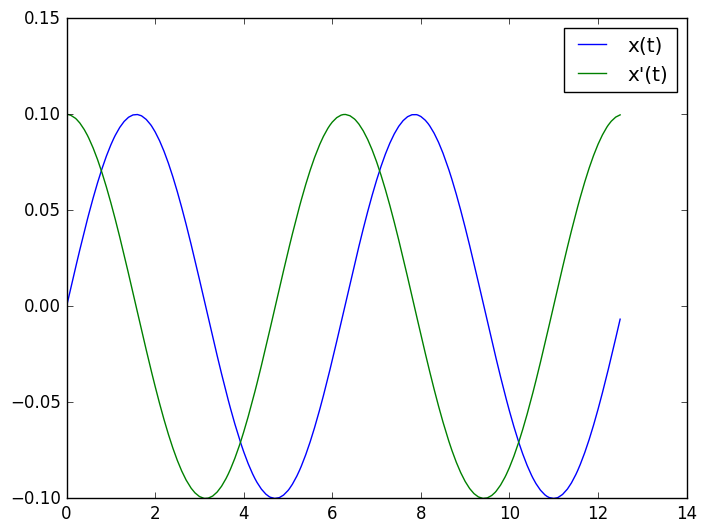

In [6]:
using PyPlot
plot(t, x, label="x(t)")
plot(t, v, label="x'(t)")
legend();

That's it.